## Lecture 2: Comparing Linear Regression to K-NN Regression
  

In [249]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Simple Linear Regression

### Linear regression with a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

* Let's run this function and see the coefficients

In [250]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])



## Building a model with `sklearn`


In [251]:
from sklearn import linear_model

In [252]:
#fix x_train to be a column 
#this is kind of annoying Python.  
x_train = x_train.reshape(x_train.shape[0], 1)
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0 = toyregr.intercept_
beta1 = toyregr.coef_[0]

print(beta0)
print(beta1)

0.6666666666666665
1.0


In [253]:
best_fit = beta_0 + beta_1 * x_train

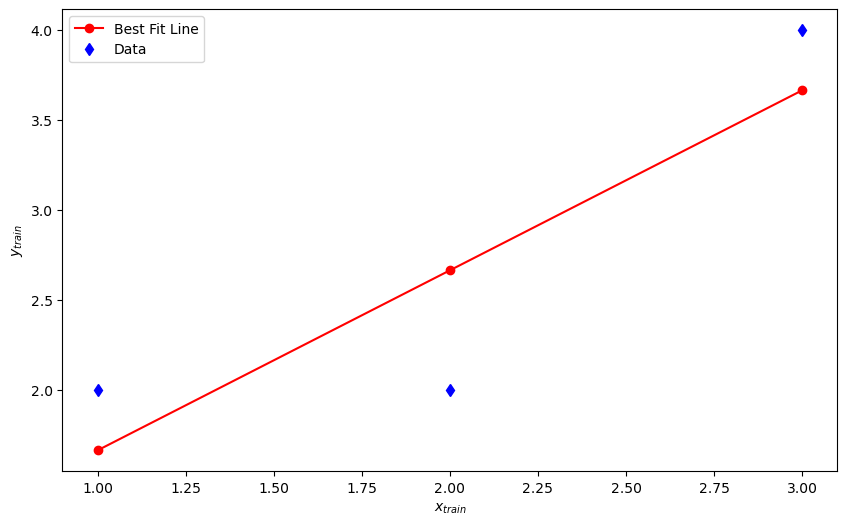

In [254]:

plt.figure(figsize = (10,6))
ax = plt.axes()

ax.plot(x_train, best_fit,'ro-', label='Best Fit Line')
ax.plot(x_train, y_train,'bd', label='Data')

ax.set_xlabel(r'$x_{train}$')
ax.set_ylabel(r'$y_{train}$')
ax.legend()

### The structure of the `scikit-learn` library methods

For most standard models we will use the [scikit learn (sklearn)](https://scikit-learn.org/stable/index.html) module 


**General sklearn model fitting code-structure :**

*Split Data into Train and Test Set*

traindara, testdata = train_test_split(dfcars, test_size=0.2, random_state=42)

Identify the predictors (x_train, x_test) and target (y_train, y_test)

*Define Model*

model = sklearn_model_name(hyper_parameter1 = value1, hyper_parameter2 = value2....)

* Every model has a list of hyperparameters that can be set using sklearn for the specific problem. In practice it is advisable to cross-validate to tune the hyperparameters to find the model witht he best prediction performance.

*Fit Model*
model.fit(x_train, y_train)

* ```model.fit``` calculates the parameters of your model corresponding to the training data and hyperparameters you provided.

*Get Predictions*
#on training data 
y_prediction_train = model.predict(x_train)
#on test data
y_prediction_test = model.predict(x_test)

 ```model.predict``` is the standard method called to make the model predict values for a specific X. Depending on if you feed x_train or x_test, you will get a y_prediction_train or y_prediction_test respectively.

*Evaluate Model*
r2_train = model.score(y_train, y_pred_train)
r2_test = model.score(y_test, y_pred_test)

* Evaluation of model can vary according to the task at hand i.e. Regression or Classification. For Regression, $R^2$ Score is a good starting point, while for Classification, Accuracy (%) is a good starting point.  
* In general, we always expect models to do well with training data.  (If they didnt we would just move on). The challenge is to get the model to work with test data.  


![](../images/featurematrix.png)

<!--![](../images/sklearn2.jpg)-->

### Fuel Consumption Data Set 
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [255]:
import pandas as pd
#load mtcars
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [256]:
dfcars.shape

(32, 12)

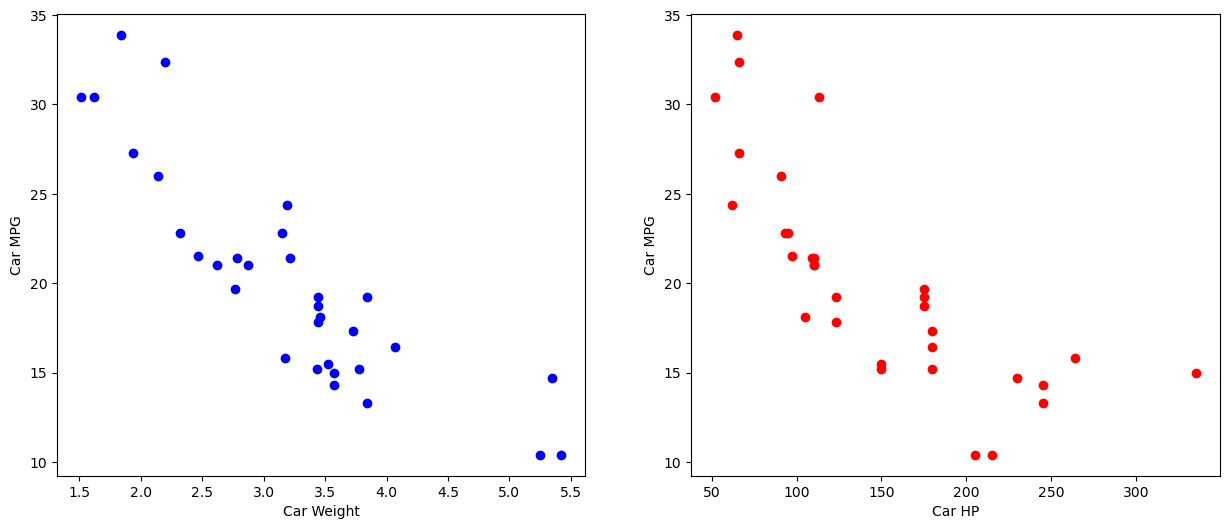

In [257]:
y_mpg = np.array(dfcars.mpg)
x_wt = np.array(dfcars.wt)
x_hp = np.array(dfcars.hp)
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(x_wt, y_mpg,'bo')
ax[0].set_xlabel('Car Weight')
ax[0].set_ylabel('Car MPG')
ax[1].plot(x_hp, y_mpg,'ro')
ax[1].set_xlabel('Car HP')
ax[1].set_ylabel('Car MPG')
plt.show()

Next, let's split the dataset into a training set and test set.

In [258]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
#this is cool.  I can directly split the data frame, and thus be able to have two seaprate data frames. 
traindf, testdf = train_test_split(dfcars, test_size=0.3, random_state=83)


In [259]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 9 to 18
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22 non-null     object 
 1   mpg         22 non-null     float64
 2   cyl         22 non-null     int64  
 3   disp        22 non-null     float64
 4   hp          22 non-null     int64  
 5   drat        22 non-null     float64
 6   wt          22 non-null     float64
 7   qsec        22 non-null     float64
 8   vs          22 non-null     int64  
 9   am          22 non-null     int64  
 10  gear        22 non-null     int64  
 11  carb        22 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 2.2+ KB


Our target variable is mpg.  Lets examine hp and wt as predictors 

In [260]:

mpg_train = np.array(traindf.mpg)
hp_train = np.array(traindf.hp)
wt_train = np.array(traindf.wt)
#do the stupid reshape to make regression function work. 
hp_train = hp_train.reshape(hp_train.shape[0], 1)
wt_train = wt_train.reshape(wt_train.shape[0], 1)

In [261]:
mpg_test = np.array(testdf.mpg)
hp_test = np.array(testdf.hp)
wt_test = np.array(testdf.wt)
#do the stupid reshape to make regression function work. 
hp_test = hp_test.reshape(hp_test.shape[0], 1)
wt_test = wt_test.reshape(wt_test.shape[0], 1)

In [262]:
from sklearn.linear_model import LinearRegression
#create linear model
lr = LinearRegression()
#fit linear model for hp
lr.fit(hp_train, mpg_train)
hp_pr_mpg = lr.predict(hp_test)
hp_test_r2 = lr.score(hp_test, mpg_test)
hp_train_r2 = lr.score(hp_train, mpg_train)
print('hp training R^2 = ' ,hp_train_r2)
print('hp test R^2 = ' ,hp_test_r2)
lr.fit(wt_train, mpg_train)
wt_pr_mpg = lr.predict(wt_test)
wt_train_r2 = lr.score(wt_train, mpg_train)
wt_test_r2 = lr.score(wt_test, mpg_test)
print('wt training R^2 =' ,wt_train_r2)
print('wt test R^2 =' ,wt_test_r2)

hp training R^2 =  0.605653885592825
hp test R^2 =  0.5786483221508159
wt training R^2 = 0.7984919418023596
wt test R^2 = 0.5670679031203465


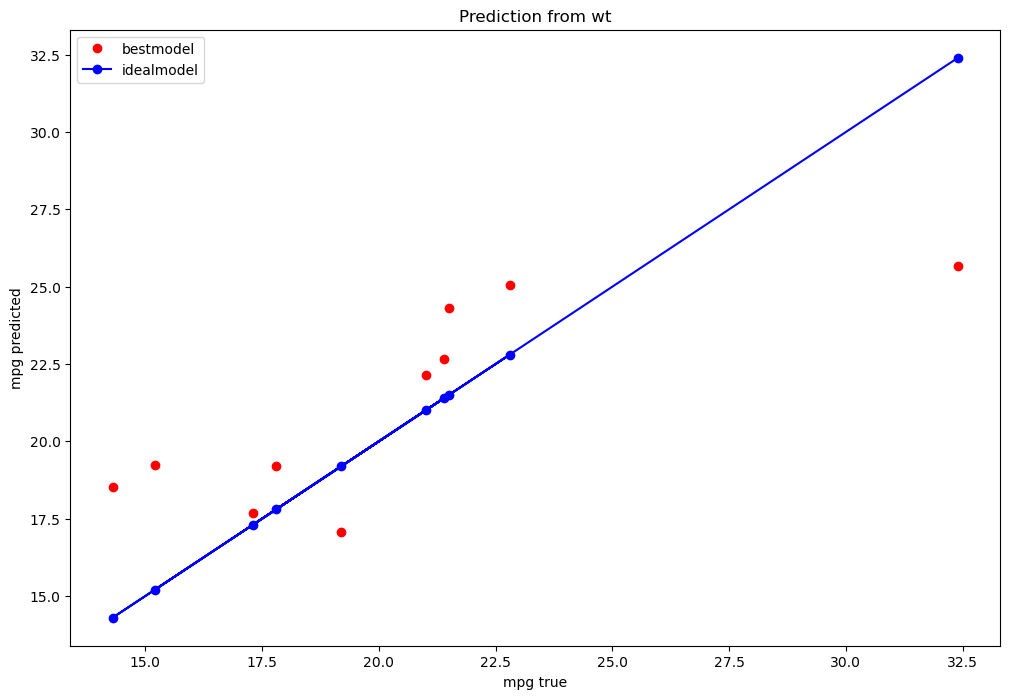

In [263]:
plt.figure(figsize = (12,8))
plt.plot(mpg_test,wt_pr_mpg,'ro', label = 'bestmodel')
plt.plot(mpg_test,mpg_test,'bo-', label = 'idealmodel')
plt.legend()
plt.xlabel('mpg true')
plt.ylabel('mpg predicted')
plt.title('Prediction from wt')
plt.show()


## $k$-nearest neighbors



Sklearn's nearest-neighbors regressor is called `sklearn.neighbors.KNeighborsRegressor`. Its main parameter is $k$ the `number of nearest neighbors`. There are other parameters such as the distance metric (default is the Euclidean distance). 

For a list of all the parameters see the [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Arbitrarily, let's use $5$ nearest neighbors.

In [264]:
# Import the library
from sklearn.neighbors import KNeighborsRegressor

In [265]:
# Set number of neighbors hyperparameter
k = 1

#make a model
knnreg = KNeighborsRegressor(n_neighbors=k)

# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(wt_train, mpg_train)

# Evaluate the outcome on the train set using R^2
wt_r2_train = knnreg.score(wt_train, mpg_train)
wt_r2_test = knnreg.score(wt_test, mpg_test)
# Print results
print('R^2 on the training set:', wt_r2_train)
print('R^2 on the test set:', wt_r2_test)

R^2 on the training set: 0.9997194793536804
R^2 on the test set: 0.5146604971208313


In [266]:
scores_train = list() # R2 scores
scores_test = list()
predictions = list()
for k in range(1,16):
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    # Fit the model to training data
    knnreg.fit(wt_train, mpg_train) 
    predictions.append(knnreg.predict(wt_test))
    # Calculate R^2 score for training 
    score = knnreg.score(wt_train, mpg_train) 
    scores_train.append(score)
    # Calculate R^2 score for test
    score = knnreg.score(wt_test, mpg_test) 
    scores_test.append(score)



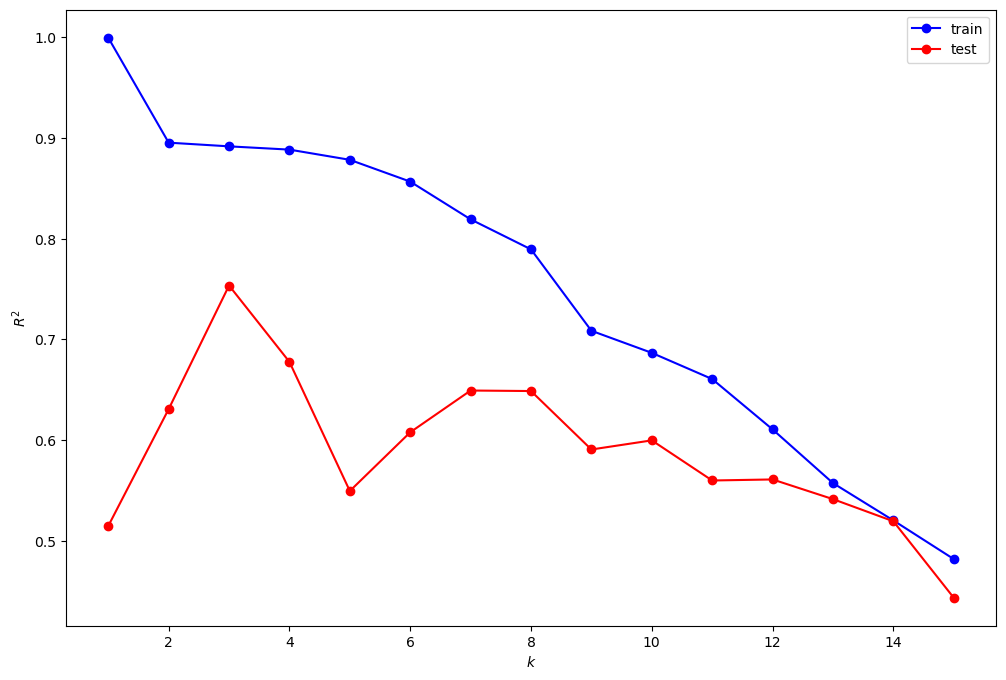

In [267]:
ks = list(range(1,16))
# Plot
plt.figure(figsize=(12,8))
plt.plot(ks, scores_train,'bo-',label='train')
plt.plot(ks, scores_test,'ro-',label = 'test')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$R^{2}$')
plt.show()

Text(0, 0.5, 'mpg predicted')

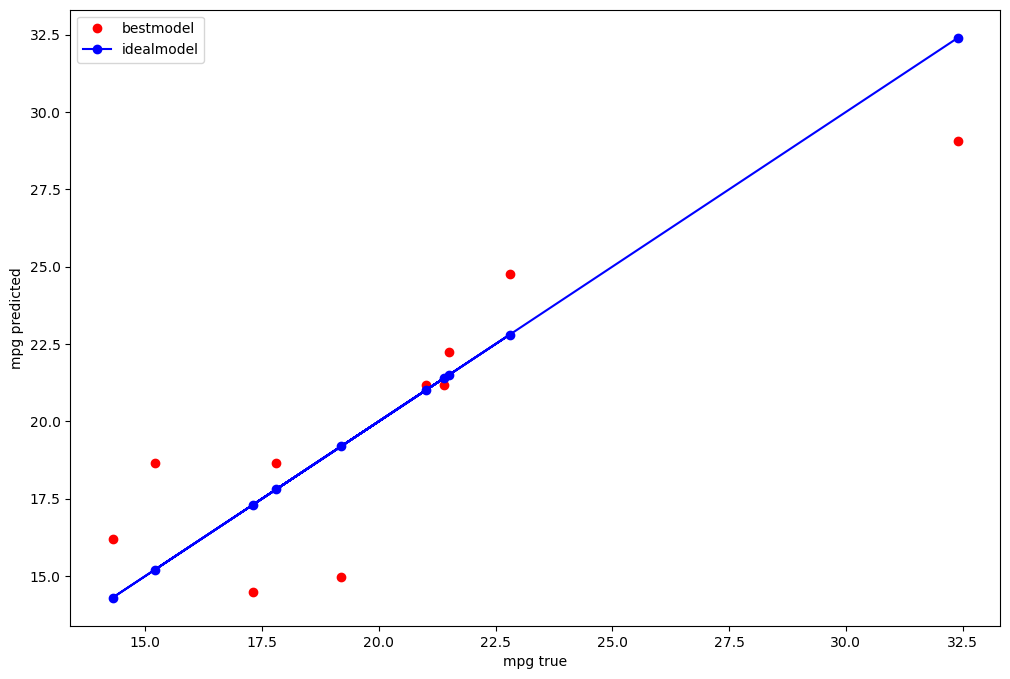

In [268]:
bestk = 3
plt.figure(figsize = (12,8))
plt.plot(mpg_test,predictions[bestk-1],'ro', label = 'bestmodel')
plt.plot(mpg_test,mpg_test,'bo-', label = 'idealmodel')
plt.legend()
plt.xlabel('mpg true')
plt.ylabel('mpg predicted')


In [269]:
scores_train = list() # R2 scores
scores_test = list()
predictions = list()
for k in range(1,16):
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    # Fit the model to training data
    knnreg.fit(hp_train, mpg_train) 
    predictions.append(knnreg.predict(hp_test))
    # Calculate R^2 score for training 
    score = knnreg.score(hp_train, mpg_train) 
    scores_train.append(score)
    # Calculate R^2 score for test
    score = knnreg.score(hp_test, mpg_test) 
    scores_test.append(score)


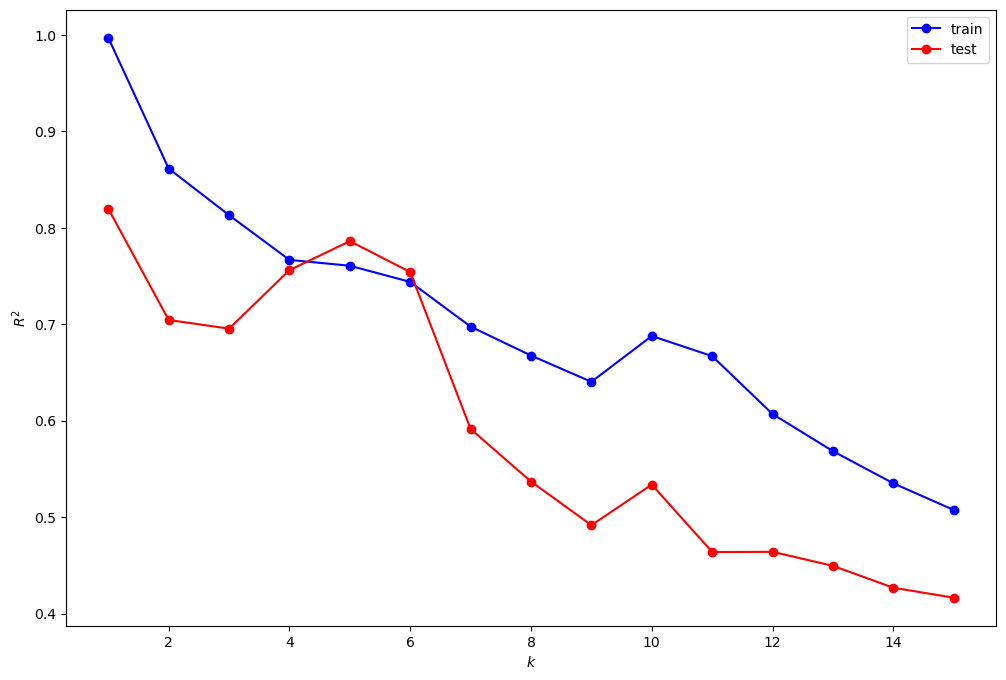

In [270]:
ks = list(range(1,16))
# Plot
plt.figure(figsize=(12,8))
plt.plot(ks, scores_train,'bo-',label='train')
plt.plot(ks, scores_test,'ro-',label = 'test')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$R^{2}$')
plt.show()

Linear Regression and kNN regression have an interesting relationship which is captured by problem #5 in chapter 3.  


Fo a linear model with no intercept show that,

$y_{i} = \beta x_{i} \rightarrow y_i = \sum_{j=1}^{n} a_{j,i} y_{j}$


$\beta = \dfrac{\sum_{j=1}^{n}x_jy_j}{\sum_{k=1}^{n}x_{k}^2}$

$ y_{i} = \dfrac{\sum_{j=1}^{n}x_jy_j}{\sum_{k=1}^{n}x_{k}^2} x_{i} $

$ y_{i}  = \sum_{j=1}^{n} \dfrac{x_{i}x_{j}}{\sum_{k=1}^{n}x^2_k} y_j $

Therefore,

$y_{i} = \sum_{j=1}^{n} a_{j,i} y_{j} $

$a_{j,i} = \dfrac{x_{i}x_{j}}{\sum_{k=1}^{n}x^2_k} $


